In [10]:
from kafka import KafkaConsumer
import json
import sys
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import squareform, pdist

def getElasticSearchKey():
    res = ""
    with open("keys/elasticSearchKey") as f:
        res += f.readline()

    return res
 

In [11]:

consumer = KafkaConsumer(bootstrap_servers='localhost:9092',
                         auto_offset_reset='earliest',
                         value_deserializer=lambda x: json.loads(x.decode('utf-8')))

subs_topic = "twitterStreamData"
consumer.subscribe(subs_topic)
messages = []
for idx,message in enumerate(consumer):
    messages.append(message.value)

KeyboardInterrupt: 

In [12]:
print(messages)

['insane ...make a tank, put crew, run for hundred of km, and a take inglourious end from ...nerd boy and a few dollars of drone and munition older then pilot ?lo', '⚡️The services of the Qiwi payment system are operating normally, the personal data of customers are safe, - the press service of the company. 👉 Ax Live Ukraine UkraineWar Russia', 'Congratulations on International Workers’ Day! This day has been widely celebrated in Russia since 1917, remains an o…', "I'm handling full classes at affordable price. Good grades guaranteed. DM me now for further discussion. uwg23 uwg24…", 'This is how an 11 year old boy sees the world after having been raped by Russia soldier in front of his mother. I find…', 'What a modified commercial drone with a dropped-munition can do!!Ukrainian 92nd Mechanized Brigade released footage of t…', '🇷🇺Russia Russian media reported an explosion followed by a huge plume of smoke and fire 🔥 in the area of Streletskoe and Tomarovka 15-20 km from Belgorod Ukraine

In [13]:

vectorizer = TfidfVectorizer(stop_words="english")
initial_batch = vectorizer.fit_transform(messages)
print(initial_batch.shape)

(200, 945)


In [16]:

km = KMeans(n_clusters = 3, init="k-means++", max_iter=100, n_init=1)
labels = km.fit_predict(initial_batch)
print(labels)

[0 2 0 0 1 0 0 0 0 2 0 2 0 2 2 0 2 2 0 2 2 2 0 0 0 0 0 2 2 0 2 2 0 0 0 0 0
 2 0 2 2 2 0 0 0 0 0 2 0 0 0 2 2 2 2 0 2 2 2 0 1 0 0 1 2 1 0 0 2 1 0 1 2 0
 2 2 2 1 2 0 0 0 0 1 2 1 1 0 2 2 2 0 0 2 1 1 1 0 2 0 0 1 0 2 0 2 2 0 2 1 0
 0 0 0 0 0 1 1 0 1 2 0 2 0 0 2 1 0 2 0 2 0 1 1 2 0 1 0 0 2 0 2 0 0 0 0 0 2
 2 0 1 0 0 2 0 2 0 1 2 2 1 2 0 2 0 2 0 2 0 0 0 2 2 0 1 0 2 1 2 2 0 0 0 2 1
 0 2 0 0 0 0 2 2 0 0 1 2 2 2 0]


In [18]:
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth":2.5})
RC = 25111993

In [19]:
data = TSNE(random_state=RC).fit_transform(initial_batch)

In [32]:
import numpy as np
import matplotlib.patheffects as PathEffects
def scatter(x, colors):
    palette = np.array(sns.color_palette("hls", 3))

    f = plt.figure(figsize=(16, 16))
    ax = plt.subplot(aspect="equal")
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=120,
                    c=palette[colors.astype(int)])
    

    txts = []
    for i in range(3):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=20)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

[0, 1, 2]


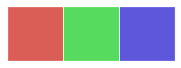

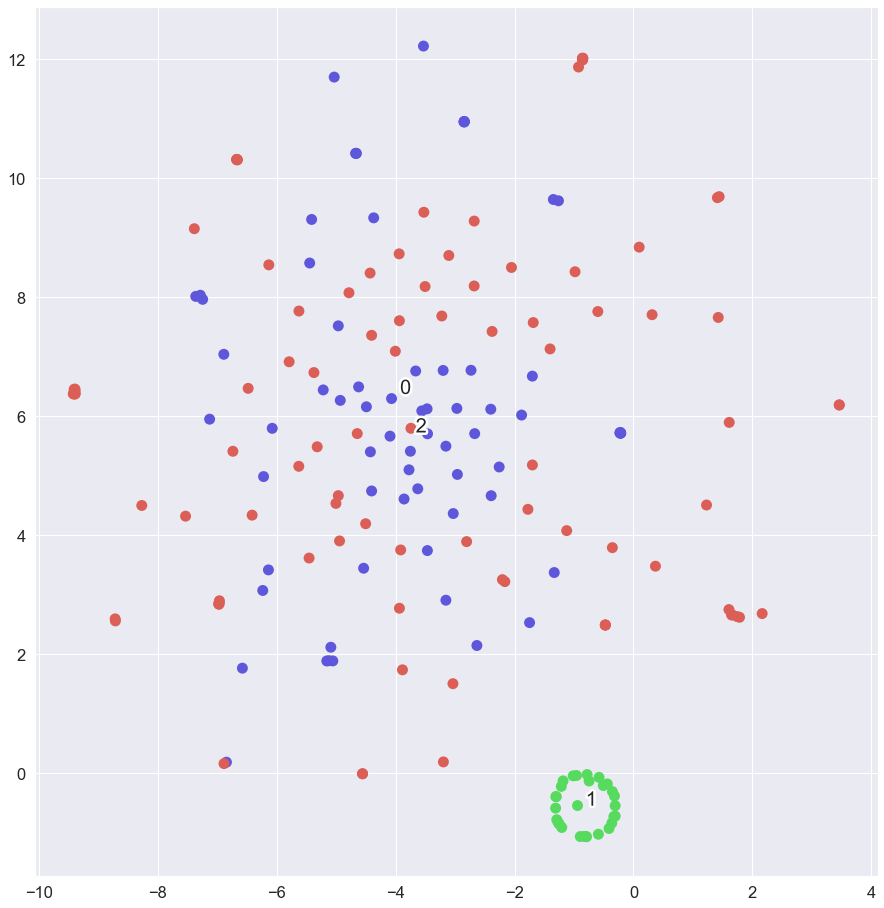

In [33]:
print(list(range(0,3)))
sns.palplot(np.array(sns.color_palette("hls", 3)))
scatter(data, labels)
plt.savefig('initial_cluster.png', dpi=120)